In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# In the next cell, add the following code that 
# we used to generate the random latitudes. Also, 
# we'll create a similar code snippet that will 
# generate longitudes. To ensure enough latitudes 
# and longitudes, we'll start with 1,500. In 
# addition, we'll pack the latitudes (lats) and 
# longitudes (lngs) as pairs by zipping them 
# (lat_lngs) with the zip() function.

In [3]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [5]:
# You can only unzip a zipped tuple once before it is 
# removed from the computer's memory. Make sure you 
# unzip the latitudes and longitudes into the 
# coordinates list before moving on.

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

In [8]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | inhambane
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | san felipe
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | saint george
Processing Record 9 of Set 1 | santiago de cao
Processing Record 10 of Set 1 | eenhana
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | aksarka
Processing Record 15 of Set 1 | alekseyevsk
Processing Record 16 of Set 1 | klaksvik
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | gallup
Processing Record 19 of Set 1 | los llanos de aridane
Processing Record 20 of Set 1 | ponta do sol
Processing Record 21 of Set 1 | new norfolk
Processing Record

Processing Record 37 of Set 4 | sharkan
Processing Record 38 of Set 4 | stornoway
Processing Record 39 of Set 4 | kaka
Processing Record 40 of Set 4 | cherskiy
Processing Record 41 of Set 4 | pa daet
Processing Record 42 of Set 4 | akyab
Processing Record 43 of Set 4 | luanda
Processing Record 44 of Set 4 | sheregesh
Processing Record 45 of Set 4 | kihei
Processing Record 46 of Set 4 | saint-denis
Processing Record 47 of Set 4 | north bend
Processing Record 48 of Set 4 | norman wells
Processing Record 49 of Set 4 | batagay
Processing Record 50 of Set 4 | cayenne
Processing Record 1 of Set 5 | port-cartier
Processing Record 2 of Set 5 | katherine
Processing Record 3 of Set 5 | cabo san lucas
Processing Record 4 of Set 5 | vao
Processing Record 5 of Set 5 | ambunti
Processing Record 6 of Set 5 | port shepstone
Processing Record 7 of Set 5 | rocha
Processing Record 8 of Set 5 | severnyy
Processing Record 9 of Set 5 | laramie
Processing Record 10 of Set 5 | pervomayskoye
Processing Record 

Processing Record 29 of Set 8 | lappeenranta
Processing Record 30 of Set 8 | west lorne
Processing Record 31 of Set 8 | rodrigues alves
Processing Record 32 of Set 8 | tadine
Processing Record 33 of Set 8 | hasaki
Processing Record 34 of Set 8 | auburn
Processing Record 35 of Set 8 | pointe michel
Processing Record 36 of Set 8 | kudahuvadhoo
Processing Record 37 of Set 8 | sribne
Processing Record 38 of Set 8 | vrangel
Processing Record 39 of Set 8 | kyabe
Processing Record 40 of Set 8 | warqla
City not found. Skipping...
Processing Record 41 of Set 8 | sioux lookout
Processing Record 42 of Set 8 | zhigansk
Processing Record 43 of Set 8 | okato
Processing Record 44 of Set 8 | bilma
Processing Record 45 of Set 8 | gawler
Processing Record 46 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 47 of Set 8 | porteirinha
Processing Record 48 of Set 8 | dakar
Processing Record 49 of Set 8 | atbasar
Processing Record 50 of Set 8 | beauvais
Processing Record 1 of Set 9 | kani

Processing Record 16 of Set 12 | beringovskiy
Processing Record 17 of Set 12 | suntar
Processing Record 18 of Set 12 | geresk
City not found. Skipping...
Processing Record 19 of Set 12 | ibra
Processing Record 20 of Set 12 | stokmarknes
Processing Record 21 of Set 12 | tingrela
City not found. Skipping...
Processing Record 22 of Set 12 | baruun-urt
Processing Record 23 of Set 12 | san matias
Processing Record 24 of Set 12 | sandwick
Processing Record 25 of Set 12 | maralal
Processing Record 26 of Set 12 | leh
Processing Record 27 of Set 12 | yongan
Processing Record 28 of Set 12 | quincy
Processing Record 29 of Set 12 | miranorte
City not found. Skipping...
Processing Record 30 of Set 12 | port lincoln
Processing Record 31 of Set 12 | joao pinheiro
Processing Record 32 of Set 12 | senneterre
Processing Record 33 of Set 12 | synya
Processing Record 34 of Set 12 | husavik
Processing Record 35 of Set 12 | brae
Processing Record 36 of Set 12 | portsmouth
Processing Record 37 of Set 12 | fl

In [10]:
len(city_data)

543

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,37.99,93,90,12.66,US,2021-04-17 02:02:48
1,Cape Town,-33.9258,18.4232,66.99,82,0,3.44,ZA,2021-04-17 02:01:24
2,Rikitea,-23.1203,-134.9692,77.65,69,100,8.90,PF,2021-04-17 02:03:58
3,Inhambane,-23.8650,35.3833,69.35,63,94,16.98,MZ,2021-04-17 02:03:58
4,Punta Arenas,-53.1500,-70.9167,46.40,76,75,10.36,CL,2021-04-17 01:59:29
5,San Felipe,10.3399,-68.7425,73.13,96,92,2.62,VE,2021-04-17 02:03:59
6,Mataura,-46.1927,168.8643,55.99,63,80,5.99,NZ,2021-04-17 02:03:59
7,Saint George,37.1041,-113.5841,61.00,29,75,19.57,US,2021-04-17 02:00:08
8,Santiago De Cao,-7.9589,-79.2392,67.01,85,100,11.36,PE,2021-04-17 02:03:59
9,Eenhana,-17.4667,16.3333,62.60,67,31,3.44,NA,2021-04-17 02:04:00


In [12]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-04-17 02:02:48,42.0970,-79.2353,37.99,93,90,12.66
1,Cape Town,ZA,2021-04-17 02:01:24,-33.9258,18.4232,66.99,82,0,3.44
2,Rikitea,PF,2021-04-17 02:03:58,-23.1203,-134.9692,77.65,69,100,8.90
3,Inhambane,MZ,2021-04-17 02:03:58,-23.8650,35.3833,69.35,63,94,16.98
4,Punta Arenas,CL,2021-04-17 01:59:29,-53.1500,-70.9167,46.40,76,75,10.36
...,...,...,...,...,...,...,...,...,...
538,Brae,GB,2021-04-17 02:06:33,60.3964,-1.3530,43.07,86,100,12.03
539,Portsmouth,GB,2021-04-17 02:01:52,50.7990,-1.0913,43.00,100,6,6.24
540,Flin Flon,CA,2021-04-17 02:06:34,54.7682,-101.8650,32.41,91,15,1.30
541,Victoria,HK,2021-04-17 02:05:29,22.2855,114.1577,75.00,90,100,1.01


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

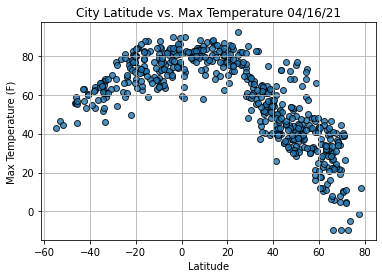

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

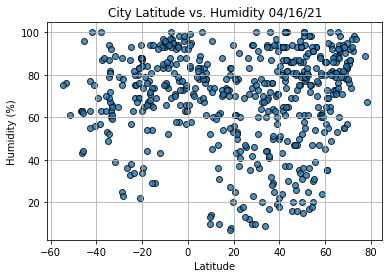

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

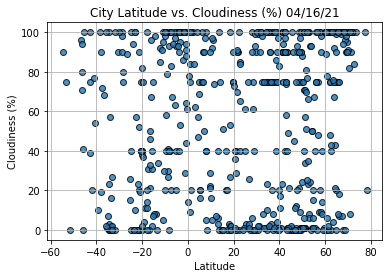

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

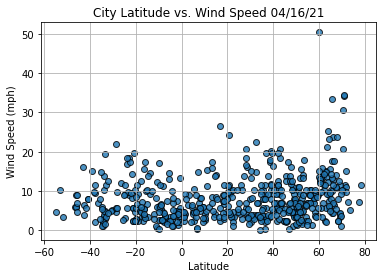

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# To determine how strong the relationship is between the fitted 
# line and the data, we find the correlation coefficient, or 
# r-value. A correlation coefficient close to 1 shows a strong 
# positive correlation, whereas close to –1 shows a strong 
# negative correlation. A correlation coefficient close to zero 
# is no correlation.

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-04-17 02:02:48,42.0970,-79.2353,37.99,93,90,12.66
1,Cape Town,ZA,2021-04-17 02:01:24,-33.9258,18.4232,66.99,82,0,3.44
2,Rikitea,PF,2021-04-17 02:03:58,-23.1203,-134.9692,77.65,69,100,8.90
3,Inhambane,MZ,2021-04-17 02:03:58,-23.8650,35.3833,69.35,63,94,16.98
4,Punta Arenas,CL,2021-04-17 01:59:29,-53.1500,-70.9167,46.40,76,75,10.36
...,...,...,...,...,...,...,...,...,...
538,Brae,GB,2021-04-17 02:06:33,60.3964,-1.3530,43.07,86,100,12.03
539,Portsmouth,GB,2021-04-17 02:01:52,50.7990,-1.0913,43.00,100,6,6.24
540,Flin Flon,CA,2021-04-17 02:06:34,54.7682,-101.8650,32.41,91,15,1.30
541,Victoria,HK,2021-04-17 02:05:29,22.2855,114.1577,75.00,90,100,1.01


In [22]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame. 
# The loc method accesses a group of rows and columns 
# in the current DataFrame by an index, labels, or a 
# Boolean array. The syntax to get a specific row 
# from a current DataFrame is row = df.loc[row_index].

In [23]:
index13 = city_data_df.loc[13]

In [24]:
index13

City                      Aksarka
Country                        RU
Date          2021-04-17 02:04:01
Lat                       66.5606
Lng                       67.7975
Max Temp                     5.94
Humidity                       91
Cloudiness                    100
Wind Speed                   6.49
Name: 13, dtype: object

In [25]:
# We can also filter a DataFrame based on a value 
# of a row. For instance, if we wanted to get all 
# Northern Hemisphere latitudes, for latitudes 
# greater than or equal to 0, we can filter the 
# city_data_df DataFrame using the code 
# city_data_df["Lat"] >= 0. Executing this code 
# will return either "True" or "False" for all 
# the rows that meet these criteria.

city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4      False
       ...  
538     True
539     True
540     True
541     True
542     True
Name: Lat, Length: 543, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-04-17 02:02:48,42.0970,-79.2353,37.99,93,90,12.66
5,San Felipe,VE,2021-04-17 02:03:59,10.3399,-68.7425,73.13,96,92,2.62
7,Saint George,US,2021-04-17 02:00:08,37.1041,-113.5841,61.00,29,75,19.57
13,Aksarka,RU,2021-04-17 02:04:01,66.5606,67.7975,5.94,91,100,6.49
14,Alekseyevsk,RU,2021-04-17 02:04:01,57.8406,108.3492,31.86,89,100,8.57


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [28]:
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-04-17 02:02:48,42.0970,-79.2353,37.99,93,90,12.66
5,San Felipe,VE,2021-04-17 02:03:59,10.3399,-68.7425,73.13,96,92,2.62
7,Saint George,US,2021-04-17 02:00:08,37.1041,-113.5841,61.00,29,75,19.57
13,Aksarka,RU,2021-04-17 02:04:01,66.5606,67.7975,5.94,91,100,6.49
14,Alekseyevsk,RU,2021-04-17 02:04:01,57.8406,108.3492,31.86,89,100,8.57
...,...,...,...,...,...,...,...,...,...
538,Brae,GB,2021-04-17 02:06:33,60.3964,-1.3530,43.07,86,100,12.03
539,Portsmouth,GB,2021-04-17 02:01:52,50.7990,-1.0913,43.00,100,6,6.24
540,Flin Flon,CA,2021-04-17 02:06:34,54.7682,-101.8650,32.41,91,15,1.30
541,Victoria,HK,2021-04-17 02:05:29,22.2855,114.1577,75.00,90,100,1.01


In [29]:
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Cape Town,ZA,2021-04-17 02:01:24,-33.9258,18.4232,66.99,82,0,3.44
2,Rikitea,PF,2021-04-17 02:03:58,-23.1203,-134.9692,77.65,69,100,8.90
3,Inhambane,MZ,2021-04-17 02:03:58,-23.8650,35.3833,69.35,63,94,16.98
4,Punta Arenas,CL,2021-04-17 01:59:29,-53.1500,-70.9167,46.40,76,75,10.36
6,Mataura,NZ,2021-04-17 02:03:59,-46.1927,168.8643,55.99,63,80,5.99
...,...,...,...,...,...,...,...,...,...
515,Charters Towers,AU,2021-04-17 02:06:27,-20.1000,146.2667,83.80,34,2,8.57
516,Ngunguru,NZ,2021-04-17 02:06:27,-35.6167,174.5000,66.00,63,2,8.01
527,San Matias,BO,2021-04-17 02:06:30,-16.3667,-58.4000,78.58,68,33,4.07
533,Port Lincoln,AU,2021-04-17 02:06:32,-34.7333,135.8667,64.40,49,7,5.44


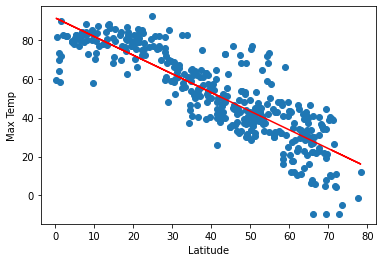

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-15))

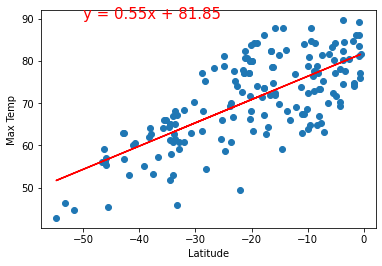

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

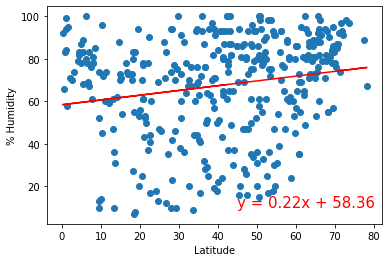

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

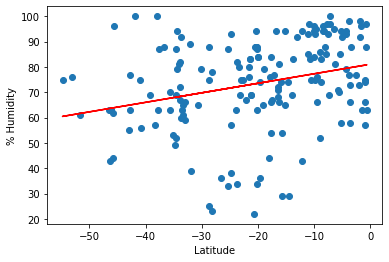

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

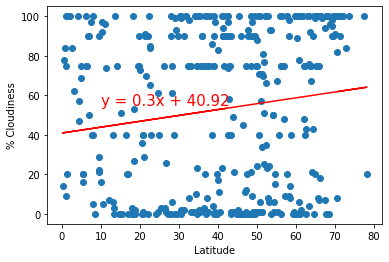

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

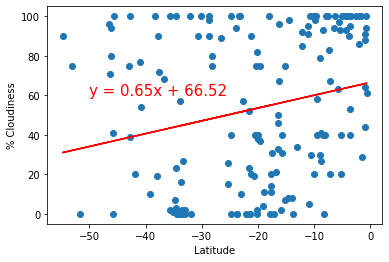

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

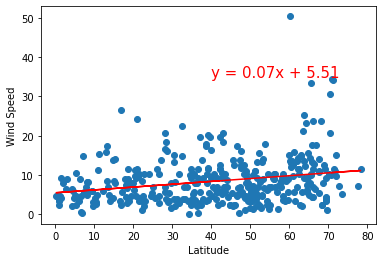

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

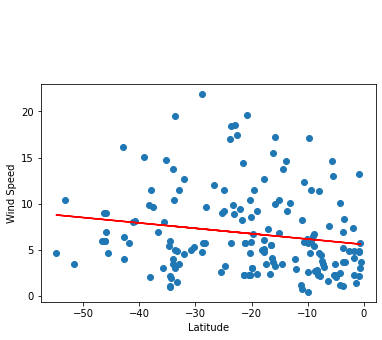

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,30))

In [38]:
# # TROUBLE-SHOOTING MISSING TITLES
# 
# # Linear regression on the Southern Hemisphere
# x_values = southern_hemi_df["Lat"]
# y_values = southern_hemi_df["Wind Speed"]
# # Call the function.
# plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere', 'Wind Speed',(-30,30))

In [39]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [40]:
# LOC METHOD ON DATAFRAME
# 
# Next, filter the maximum temperature column in 
# the city_data_df DataFrame using logical operators 
# to create a new DataFrame with the cities that meet 
# the customer's criteria.
# 
# Recall that you use the loc[] method on the current 
# DataFrame to create a new DataFrame from a current 
# DataFrame. Inside the brackets, add the conditional 
# filter.

In [41]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Rikitea,PF,2021-04-17 02:03:58,-23.1203,-134.9692,77.65,69,100,8.90
12,Vaini,TO,2021-04-17 02:04:00,-21.2000,-175.2000,80.60,69,20,5.75
20,Hilo,US,2021-04-17 02:02:30,19.7297,-155.0900,78.80,53,75,8.05
21,Sorong,ID,2021-04-17 02:03:58,-0.8833,131.2500,86.13,66,64,13.24
22,San Cristobal,VE,2021-04-17 02:04:03,7.7669,-72.2250,84.20,61,40,6.91
24,Arraial Do Cabo,BR,2021-04-17 02:04:04,-22.9661,-42.0278,75.27,75,10,18.48
30,Nioro,GM,2021-04-17 02:04:06,13.3500,-15.7500,77.52,36,3,8.55
31,Auki,SB,2021-04-17 02:04:06,-8.7676,160.7034,84.13,74,27,2.73
35,Sola,VU,2021-04-17 02:04:08,-13.8833,167.5500,82.67,69,8,14.67
37,Ibotirama,BR,2021-04-17 02:04:09,-12.1853,-43.2206,76.93,43,85,4.05


In [42]:
# Before moving on, determine if the preferred_cities_df 
# DataFrame has any null values for any of the rows.

preferred_cities_df.isnull().sum()

City          0
Country       0
Date          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
dtype: int64

In [43]:
# Before moving on, determine if the preferred_cities_df 
# DataFrame has any null values for any of the rows.

preferred_cities_df.count()

City          150
Country       150
Date          150
Lat           150
Lng           150
Max Temp      150
Humidity      150
Cloudiness    150
Wind Speed    150
dtype: int64

In [44]:
# Before moving on, determine if the preferred_cities_df 
# DataFrame has any null values for any of the rows.

preferred_cities_df.notnull().sum()

City          150
Country       150
Date          150
Lat           150
Lng           150
Max Temp      150
Humidity      150
Cloudiness    150
Wind Speed    150
dtype: int64

In [45]:
preferred_cities_df.count()

City          150
Country       150
Date          150
Lat           150
Lng           150
Max Temp      150
Humidity      150
Cloudiness    150
Wind Speed    150
dtype: int64

In [46]:
# Consider the following guidance:
# 
# Depending on the time of year and the seasons, 
# you might have to adjust the minimum and maximum 
# temperature to get enough cities.
# 
# It is a good idea to keep the number of cities 
# to fewer than 200 to make it easier to plot the 
# markers on the heatmap.
# 
# If you have some rows with null values, you'll 
# need to drop them using the dropna() method at 
# the end of your filtering statement when you are 
# creating the new DataFrame.

In [47]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Rikitea,PF,77.65,-23.1203,-134.9692,
12,Vaini,TO,80.60,-21.2000,-175.2000,
20,Hilo,US,78.80,19.7297,-155.0900,
21,Sorong,ID,86.13,-0.8833,131.2500,
22,San Cristobal,VE,84.20,7.7669,-72.2250,
24,Arraial Do Cabo,BR,75.27,-22.9661,-42.0278,
30,Nioro,GM,77.52,13.3500,-15.7500,
31,Auki,SB,84.13,-8.7676,160.7034,
35,Sola,VU,82.67,-13.8833,167.5500,
37,Ibotirama,BR,76.93,-12.1853,-43.2206,


In [48]:
# Import the API key.
from config import g_key

In [49]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [50]:
# How would you retrieve the name of the first hotel in the results dictionary?
# 
# hotels["results"][0]["name"]